# Project 1: Medical Insurance
This program is written for fulfillment of Data Scientist: Analytics Specialist course at codecademy.com.<br>
<br>
Course    = Data Scientist: Analytics Specialist<br>
Module    = Module 6: Portfolio Project: U.S. Medical Insurance<br>
<br>
Pandas is not used in this program. Pandas is covered in module 7. 

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import csv

# Global variables
age_min = 1000
age_max = 0
policy_holders_total = 0



def analysis_count(insurance_data, x):
    """   
    Count the number of policy holders.
    
    Example 1:
        x, y = analysis_count(insurance_data, 'sex')
        
        Return:
        x = ['male', 'female']
        y = [676, 662]
        
        Meaning:
        There are 676 males.
        There are 662 females.     
          
    Example 2:
        x, y = analysis_count(insurance_data, 'region')   
        
        Return:
        x = ['northeast', 'northwest', 'southeast', 'southwest']
        y = [324, 325, 364, 325]
        
        Meaning:
        There are 324 policy holders in northeast region. 
        There are 325 policy holders in northwest region. 
        There are 364 policy holders in southeast region.        
        There are 325 policy holders in southwest region.            
    """
    # Initialization
    result = {}
    if x == 'age':
        for each_age in range(age_min, age_max + 1):
            result[each_age] = 0
    elif x == 'sex':
        result['male'] = 0
        result['female'] = 0
    elif x == 'bmi':
        result['Underweight (Severe)'] = 0
        result['Underweight (Moderate)'] = 0        
        result['Underweight (Mild)'] = 0          
        result['Normal'] = 0      
        result['Overweight (Pre-obese)'] = 0  
        result['Obese (Class I)'] = 0    
        result['Obese (Class II)'] = 0    
        result['Obese (Class III)'] = 0  
    elif x == 'children':
        for each_age in range(0, 7):
            result[each_age] = 0   
    elif x == 'smoker':
        result['yes'] = 0
        result['no'] = 0           
    elif x == 'region':
        result['northeast'] = 0
        result['northwest'] = 0  
        result['southeast'] = 0          
        result['southwest'] = 0  
    else:
        print('Error: Invalid x value in analysis_count.')
 
    # Start counting
    for each_person in insurance_data:
        result[each_person[x]] += 1 
        
    return list(result.keys()), list(result.values())



def analysis_charges(insurance_data, limits):
    """ 
    Compute the mean insurance charge for each age.
    
    Example 1:
        x, y = analysis_charges(insurance_data, {'sex': 'male'  })
    
        Return:
        x = [18, 19, 20, ..., 62, 63, 64]
        y = [7603, 9876, 12780, ... , 21843, 17201, 23058]
        
        Meaning:
        The mean insurance charge for 18 years old male is US$7,603.
        The mean insurance charge for 19 years old male is US$9,876.
        The mean insurance charge for 20 years old male is US$12,780.
        ...
        The mean insurance charge for 62 years old male is US$21,843.
        The mean insurance charge for 63 years old male is US$17,201.
        The mean insurance charge for 64 years old male is US$23,058.
        
    Example 2:
        x, y = analysis_charges(insurance_data, {'sex': 'male', 'smoker': 'no',  'bmi': 'Obese (Class II)'})
    
        Return:
        x = [18, 19, 20, ..., 62, 63, 64]
        y = [5253, 1455, 27724, ..., 12980, 14576, 14347]
        
        Meaning:
        The mean insurance charge for 18 years old male non smoker Obese (Class II) is US$5,253.
        The mean insurance charge for 19 years old male non smoker Obese (Class II) is US$1,455.
        The mean insurance charge for 20 years old male non smoker Obese (Class II) is US$2,7724.
        ...
        The mean insurance charge for 62 years old male non smoker Obese (Class II) is US$12,980.
        The mean insurance charge for 63 years old male non smoker Obese (Class II) is US$14,576.
        The mean insurance charge for 64 years old male non smoker Obese (Class II) is US$14,347.      
    """    
    # Initialization
    x = range(age_min, age_max + 1)
    y = []
    temp = {}
    for each_age in range(age_min, age_max + 1):
        temp[each_age] = {'sum': 0.0, 'number': 0}

    # Loop through every person in insurance_data    
    for each_person in insurance_data:
        check = True
        for each_limit in limits:
            # Check for limits
            # In example 2 above, if the person is not male non smoker Obese (Class II), check = false
            if (check == True) and each_person[each_limit] != limits[each_limit]:
                check = False   
        if check == True:   
            # All limits fulfilled
            # In example 2 above, the person is male non smoker Obese (Class II)            
            temp[each_person['age']]['sum'] += each_person['charges']
            temp[each_person['age']]['number'] += 1  
    
    for each_age in range(age_min, age_max + 1):
        # if temp[each_age]['number'] == 0 means there are nobody with this age.
        if temp[each_age]['number'] == 0:
            y.append(float('nan'))
        else:
            y.append(temp[each_age]['sum']/temp[each_age]['number'])           
    return x, y



# Main program
with open('insurance.csv', newline='') as insurance_csv:
    insurance_data = list(csv.DictReader(insurance_csv, delimiter=','))

# Initialization    
for each_person in insurance_data:
    policy_holders_total += 1
    bmi_float = float(each_person['bmi'])
    # BMI is a float. It is replaced with a category name.
    # For BMI categories, please refers to https://en.wikipedia.org/wiki/Body_mass_index
    if bmi_float <= 16.0:
        each_person['bmi'] = 'Underweight (Severe)'
    elif bmi_float <= 16.9:
        each_person['bmi'] = 'Underweight (Moderate)'
    elif bmi_float <= 18.4:
        each_person['bmi'] = 'Underweight (Mild)'
    elif bmi_float <= 24.9:
        each_person['bmi'] = 'Normal'
    elif bmi_float <= 29.9:
        each_person['bmi'] = 'Overweight (Pre-obese)'
    elif bmi_float <= 34.9:
        each_person['bmi'] = 'Obese (Class I)'
    elif bmi_float <= 39.9:
        each_person['bmi'] = 'Obese (Class II)'
    else:
        each_person['bmi'] = 'Obese (Class III)'
        
    each_person['age'] = int(each_person['age'])
    each_person['children'] = int(each_person['children'])
    each_person['charges'] = float(each_person['charges'])

    # Find the min and max age
    if each_person['age'] > age_max:
        age_max = each_person['age']
        
    if each_person['age'] < age_min:
        age_min = each_person['age']
        

Age	 Count
--------------------
18 	 69
19 	 68
20 	 29
21 	 28
22 	 28
23 	 28
24 	 28
25 	 28
26 	 28
27 	 28
28 	 28
29 	 27
30 	 27
31 	 27
32 	 26
33 	 26
34 	 26
35 	 25
36 	 25
37 	 25
38 	 25
39 	 25
40 	 27
41 	 27
42 	 27
43 	 27
44 	 27
45 	 29
46 	 29
47 	 29
48 	 29
49 	 28
50 	 29
51 	 29
52 	 29
53 	 28
54 	 28
55 	 26
56 	 26
57 	 26
58 	 25
59 	 25
60 	 23
61 	 23
62 	 23
63 	 23
64 	 22


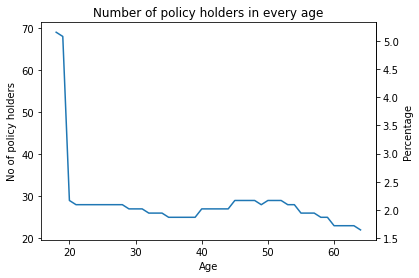

In [4]:
# Graph 1: Number of policy holders in every age
x, y = analysis_count(insurance_data, 'age')

print('Age\t Count')
print('--------------------')
for counter in range(len(x)):
    print(x[counter], '\t', y[counter])

N_P = lambda N_P: N_P/float(policy_holders_total)*100
P_N = lambda P_N: P_N*policy_holders_total
fig, ax = plt.subplots()
ax2 = ax.secondary_yaxis("right", functions=(N_P, P_N))
ax.plot(x, y)
ax.set_title('Number of policy holders in every age')
ax.set_ylabel("No of policy holders")
ax.set_xlabel('Age')
ax2.set_ylabel("Percentage")
plt.show()

Comment: <br>
There are more 18 years old and 19 years old than other ages.

Gender	 Count
--------------------
male 	 676
female 	 662


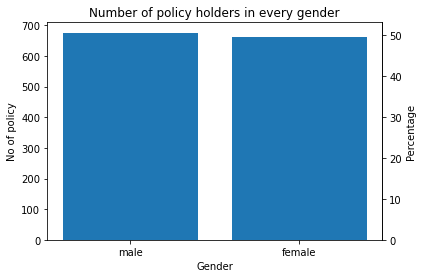

In [5]:
# Graph 2: Number of policy holders in every gender
x, y = analysis_count(insurance_data, 'sex')

print('Gender\t Count')
print('--------------------')
for counter in range(len(x)):
    print(x[counter], '\t', y[counter])
    
N_P = lambda N_P: N_P/float(policy_holders_total)*100
P_N = lambda P_N: P_N*policy_holders_total
fig, ax = plt.subplots()
ax2 = ax.secondary_yaxis("right", functions=(N_P, P_N))
ax.bar(x, y)
ax.set_title('Number of policy holders in every gender')
ax.set_ylabel("No of policy")
ax.set_xlabel('Gender')
ax2.set_ylabel("Percentage")
plt.show()

Comment: <br>
The number of male and female is roughly equal.

BMI category		 Count
------------------------------
Underweight (Severe) 	 1
Underweight (Moderate) 	 2
Underweight (Mild)   	 17
Normal               	 222
Overweight (Pre-obese) 	 380
Obese (Class I)      	 397
Obese (Class II)     	 226
Obese (Class III)    	 93


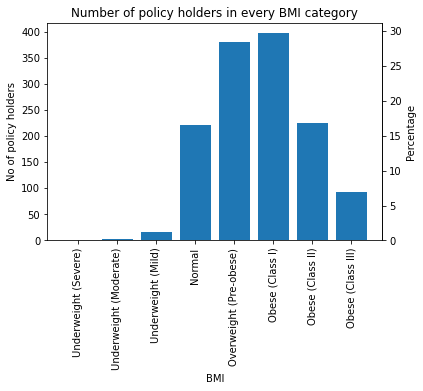

In [6]:
# Graph 3: Number of policy holders in every BMI category
x, y = analysis_count(insurance_data, 'bmi')

print('BMI category\t\t Count')
print('------------------------------')
for counter in range(len(x)):
    print('{:20}'.format(x[counter]), '\t', y[counter])
    
N_P = lambda N_P: N_P/float(policy_holders_total)*100
P_N = lambda P_N: P_N*policy_holders_total
fig, ax = plt.subplots()
ax2 = ax.secondary_yaxis("right", functions=(N_P, P_N))
ax.bar(x, y)
ax.set_title('Number of policy holders in every BMI category')
ax.set_ylabel("No of policy holders")
ax.set_xlabel('BMI')
ax2.set_ylabel("Percentage")
plt.xticks(rotation='vertical')
plt.show()

Comment: <br>
Most policy holders are either pre-obese or obese.

Number of children	 Count
----------------------------------------
0 			 574
1 			 324
2 			 240
3 			 157
4 			 25
5 			 18
6 			 0


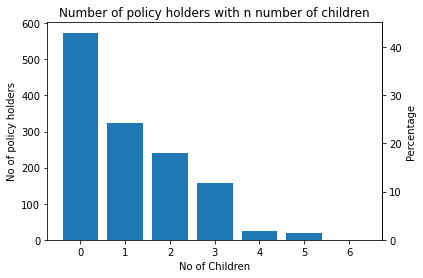

In [7]:
# Graph 4: Number of policy holders with n number of children
x, y = analysis_count(insurance_data, 'children')

print('Number of children\t Count')
print('----------------------------------------')
for counter in range(len(x)):
    print(x[counter], '\t\t\t', y[counter])
    
N_P = lambda N_P: N_P/float(policy_holders_total)*100
P_N = lambda P_N: P_N*policy_holders_total
fig, ax = plt.subplots()
ax2 = ax.secondary_yaxis("right", functions=(N_P, P_N))
ax.bar(x, y)
ax.set_title('Number of policy holders with n number of children')
ax.set_ylabel("No of policy holders")
ax.set_xlabel('No of Children')
ax2.set_ylabel("Percentage")
plt.show() 

Comment: <br>
Policy holders with no kid form the largest group.

Smoking		 Count
-------------------------
yes 		 274
no 		 1064


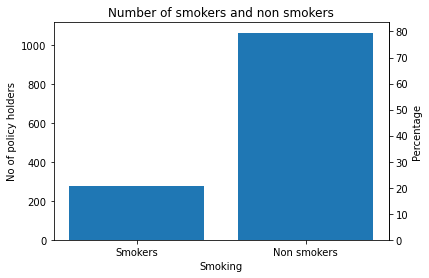

In [8]:
# Graph 5: Number of smokers and non smokers
x, y = analysis_count(insurance_data, 'smoker')

print('Smoking\t\t Count')
print('-------------------------')
for counter in range(len(x)):
    print(x[counter], '\t\t', y[counter])
    
N_P = lambda N_P: N_P/float(policy_holders_total)*100
P_N = lambda P_N: P_N*policy_holders_total
fig, ax = plt.subplots()
ax2 = ax.secondary_yaxis("right", functions=(N_P, P_N))
ax.bar(['Smokers', 'Non smokers'], y)
ax.set_title('Number of smokers and non smokers')
ax.set_ylabel("No of policy holders")
ax.set_xlabel('Smoking')
ax2.set_ylabel("Percentage")
plt.show()

Comment: <br>
There are more non smokers than smokers.

Region		 Count
-------------------------
northeast 	 324
northwest 	 325
southeast 	 364
southwest 	 325


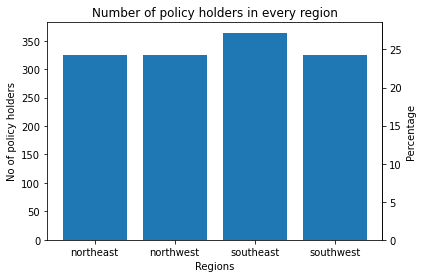

In [9]:
# Graph 6: Number of policy holders in every region
x, y = analysis_count(insurance_data, 'region')

print('Region\t\t Count')
print('-------------------------')
for counter in range(len(x)):
    print(x[counter], '\t', y[counter])
    
N_P = lambda N_P: N_P/float(policy_holders_total)*100
P_N = lambda P_N: P_N*policy_holders_total
fig, ax = plt.subplots()
ax2 = ax.secondary_yaxis("right", functions=(N_P, P_N))
ax.bar(x, y)
ax.set_title('Number of policy holders in every region')
ax.set_ylabel("No of policy holders")
ax.set_xlabel('Regions')
ax2.set_ylabel("Percentage")
plt.show()   

Comment: <br>
They are evenly distributed.

Age	 Mean charge
-----------------------
18 	 7,086
19 	 9,748
20 	 10,160
21 	 4,730
22 	 10,013
23 	 12,420
24 	 10,648
25 	 9,838
26 	 6,134
27 	 12,185
28 	 9,069
29 	 10,430
30 	 12,719
31 	 10,197
32 	 9,220
33 	 12,352
34 	 11,614
35 	 11,307
36 	 12,204
37 	 18,020
38 	 8,103
39 	 11,778
40 	 11,772
41 	 9,654
42 	 13,061
43 	 19,267
44 	 15,859
45 	 14,830
46 	 14,343
47 	 17,654
48 	 14,633
49 	 12,696
50 	 15,663
51 	 15,682
52 	 18,256
53 	 16,021
54 	 18,759
55 	 16,165
56 	 15,026
57 	 16,447
58 	 13,879
59 	 18,896
60 	 21,979
61 	 22,024
62 	 19,164
63 	 19,885
64 	 23,276


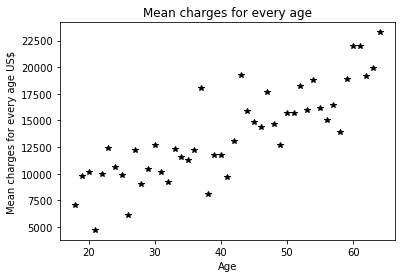

In [10]:
# Graph 7: Mean charges for every age
x, y = analysis_charges(insurance_data, {})

print('Age\t Mean charge')
print('-----------------------')
for counter in range(len(x)):
    print(x[counter], '\t', '{:,.0f}'.format(y[counter]))
    
plt.plot(x, y,'*', color='black')
plt.title('Mean charges for every age')
plt.ylabel("Mean charges for every age US$")
plt.xlabel('Age')
plt.show()

Comment: <br>
Generally, charge increases as age increases.

Mean charges
Age	   Male		 Female
---------------------------------
18 	   7603 	   6522
19 	   9876 	   9612
20 	  12780 	   7352
21 	   4193 	   5350
22 	  12073 	   7636
23 	   6249 	  18590
24 	  14726 	   6570
25 	  11437 	   7994
26 	   6238 	   6014
27 	  10408 	  13962
28 	  11623 	   6516
29 	  13299 	   7341
30 	  15605 	   9612
31 	  11546 	   8744
32 	   9514 	   8926
33 	  12264 	  12439
34 	  12290 	  10937
35 	  11266 	  11352
36 	  17275 	   6711
37 	  15957 	  20255
38 	   9920 	   6426
39 	  14356 	   9398
40 	   9705 	  13999
41 	  11538 	   7625
42 	  13884 	  12174
43 	  20000 	  18587
44 	  14457 	  17162
45 	  16783 	  12738
46 	  14255 	  14436
47 	  19344 	  16077
48 	  15850 	  13496
49 	  13307 	  12085
50 	  18164 	  12984
51 	  14280 	  16991
52 	  20686 	  15989
53 	  14641 	  17401
54 	  20989 	  16528
55 	  16246 	  16083
56 	  18296 	  11755
57 	  16184 	  16710
58 	  14630 	  13186
59 	  17727 	  19975
60 	  26262 	  17307
61 	  22039 	  22011
62 	  21

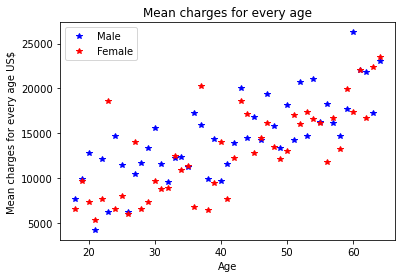

In [11]:
# Graph 8: Mean charges for every age: Male and female
x, y1 = analysis_charges(insurance_data, {'sex': 'male'  })
x, y2 = analysis_charges(insurance_data, {'sex': 'female'})

print('Mean charges')
print('Age\t   Male\t\t Female')
print('---------------------------------')
for counter in range(len(x)):
    print(x[counter], '\t', '{:6.0f}'.format(y1[counter]), '\t', '{:6.0f}'.format(y2[counter]))
    
plt.plot(x, y1, '*', label = 'Male', color = 'blue')
plt.plot(x, y2, '*', label = 'Female', color = 'red')
plt.title('Mean charges for every age')
plt.ylabel("Mean charges for every age US$")
plt.xlabel('Age')
plt.legend()
plt.show()

Comment: <br>
Generally, charge increases as age increases. 

Mean charges
           Male           Male             Female         Female
Age        Non Smokers    Smokers          Non Smokers    Smokers
--------------------------------------------------------------------
18 	   2696 	  24779 	   3717 	  26862
19 	   3220 	  29106 	   3880 	  24897
20 	   4863 	  28616 	   2484 	  19523
21 	   3211 	  17942 	   4516 	  15359
22 	   2396 	  38684 	   2706 	  34752
23 	   3946 	  36189 	   9288 	  30994
24 	   5058 	  32130 	   5954 	  14572
25 	   5233 	  28497 	   5835 	  33901
26 	   3111 	  26564 	   5310 	  14456
27 	   3473 	  27744 	   8387 	  23996
28 	   5381 	  34510 	   6516 	    nan
29 	   8114 	  32307 	   4355 	  17294
30 	   6134 	  28233 	   4573 	  26407
31 	   4564 	  29002 	   4592 	  58571
32 	   4489 	  26267 	   5983 	  25115
33 	   8421 	  25076 	   5271 	  36330
34 	   8530 	  24825 	   5503 	  40823
35 	   6634 	  26707 	   7601 	  30109
36 	   5648 	  35879 	   5630 	  18608
37 	   8834 	  39700 	   6597 	  33913
38 	   

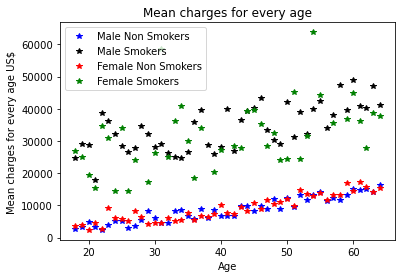

In [12]:
# Graph 9: Mean charges for every age: Male no smokers, male smokers and female no smokers and female smokers
x, y1 = analysis_charges(insurance_data, {'sex': 'male',   'smoker': 'no'})
x, y2 = analysis_charges(insurance_data, {'sex': 'male',   'smoker': 'yes'})
x, y3 = analysis_charges(insurance_data, {'sex': 'female', 'smoker': 'no'}) 
x, y4 = analysis_charges(insurance_data, {'sex': 'female', 'smoker': 'yes'})

print('Mean charges')
print('           Male           Male             Female         Female')
print('Age        Non Smokers    Smokers          Non Smokers    Smokers')
print('--------------------------------------------------------------------')
for counter in range(len(x)):
    print(x[counter], '\t', '{:6.0f}'.format(y1[counter]), '\t', '{:6.0f}'.format(y2[counter]), '\t', '{:6.0f}'.format(y3[counter]), '\t', '{:6.0f}'.format(y4[counter]))
    
    
plt.plot(x, y1, '*', label = 'Male Non Smokers', color = 'blue')
plt.plot(x, y2, '*', label = 'Male Smokers', color = 'black')
plt.plot(x, y3, '*', label = 'Female Non Smokers', color = 'red')
plt.plot(x, y4, '*', label = 'Female Smokers', color = 'green')
plt.title('Mean charges for every age')
plt.ylabel("Mean charges for every age US$")
plt.xlabel('Age')
plt.legend()
plt.show()

Comment: <br>
Smokers have much higher charges than non smokers. This is true for both male smokers and female smokers. nan (Not a number) in the table means there is nobody at this age. For example, there is no 28 years old female smoker.

Mean charges for Normal BMI Non smokers

Age	   Male		 Female		    Difference (Female - Male)
-------------------------------------------------------------
18 	   3076 	   1904		   -1172
19 	   1676 	   2235		     560
20 	   1965 	    nan
21 	   2639 	   2883		     244
22 	   4005 	   2927		   -1079
23 	   8796 	  18411		    9615
24 	   2161 	  10127		    7966
25 	   5080 	   3600		   -1480
26 	   2893 	   3244		     351
27 	   3656 	   3296		    -359
28 	   4631 	  14004		    9374
29 	   5210 	   4718		    -492
30 	   4032 	   5044		    1011
31 	   3260 	   4533		    1273
32 	    nan 	  11085
33 	  13621 	   4768		   -8853
34 	  15938 	   5873		  -10065
35 	   5125 	   6402		    1277
36 	    nan 	   6343
37 	   6592 	   6686		      94
38 	   6254 	   7034		     779
39 	   6414 	   8380		    1966
40 	   7173 	   8252		    1079
41 	   6565 	  13725		    7160
42 	   5967 	    nan
43 	   6250 	    nan
44 	   8597 	   8211		    -386
45 	   8565 	    nan
46 	   8058 	   9194		    1136
47 	 

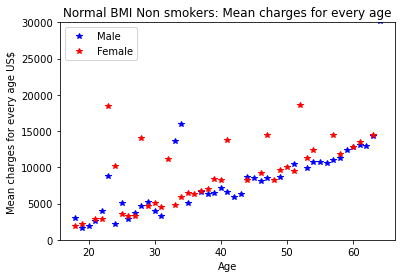

In [13]:
# Graph 10: Mean charges for every age: Normal BMI Non smokers. Male and female
x, y1 = analysis_charges(insurance_data, {'sex': 'male'  ,   'smoker': 'no',  'bmi': 'Normal'})
x, y2 = analysis_charges(insurance_data, {'sex': 'female',   'smoker': 'no',  'bmi': 'Normal'})

print('Mean charges for Normal BMI Non smokers\n')
print('Age\t   Male\t\t Female\t\t    Difference (Female - Male)')
print('-------------------------------------------------------------')
for counter in range(len(x)):
    print(x[counter], '\t', '{:6.0f}'.format(y1[counter]), '\t', '{:6.0f}'.format(y2[counter]), end='')
    if y1[counter] == y1[counter] and y2[counter] == y2[counter]:
        # if y1[counter] == y1[counter] means y1[counter] != nan
        # if y2[counter] == y2[counter] means y2[counter] != nan
        print('\t\t', '{:7.0f}'.format(y2[counter] - y1[counter]))
    else:
        print(end = "\n") 
    
plt.plot(x, y1, '*', label = 'Male', color = 'blue')
plt.plot(x, y2, '*', label = 'Female', color = 'red')
plt.title('Normal BMI Non smokers: Mean charges for every age')
plt.ylabel("Mean charges for every age US$")
plt.xlabel('Age')
plt.legend()
plt.ylim((0,30000))
plt.show()

Comment: <br>
From the above table, in the difference column, there are more positive values than negative values. Hence, generally, for normal BMI non smokers, mean female charges are higher than mean male charges. 

Mean charges for male non smokers

                           Obese           Obese           Obese           Obese            Difference
Age        Normal          Pre             Class I         Class II        Class III        Class III - Normal
----------------------------------------------------------------------------------------------------------------
18 	   3076 	   3404 	   1576 	   5253 	   1153		    2177
19 	   1676 	   4246 	   5024 	   1455 	    nan		    -221
20 	   1965 	   1868 	   2643 	  27724 	   1984		   25760
21 	   2639 	   2348 	   6674 	   1661 	    nan		    -978
22 	   4005 	   2150 	   2414 	   1683 	    nan		   -2323
23 	   8796 	   2302 	   2414 	   3007 	   2138		   -5788
24 	   2161 	   5025 	   9555 	   1987 	    nan		    -174
25 	   5080 	   6103 	   3616 	   2534 	    nan		   -2546
26 	   2893 	   3487 	   3253 	   2323 	   2927		    -571
27 	   3656 	   3071 	   3443 	    nan 	   3693
28 	   4631 	   4437 	   9062 	   3079 	    nan		   -1552
29 	   521

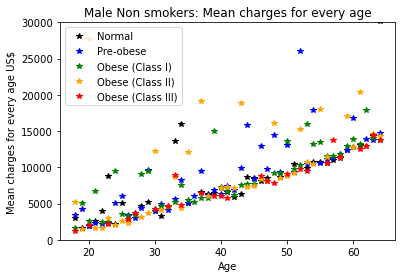

In [14]:
# Graph 11: Mean charges for every age: Male Non smokers. All BMI categories.
x, y1 = analysis_charges(insurance_data, {'sex': 'male',   'smoker': 'no',  'bmi': 'Normal'})
x, y2 = analysis_charges(insurance_data, {'sex': 'male',   'smoker': 'no',  'bmi': 'Overweight (Pre-obese)'})
x, y3 = analysis_charges(insurance_data, {'sex': 'male',   'smoker': 'no',  'bmi': 'Obese (Class I)'})
x, y4 = analysis_charges(insurance_data, {'sex': 'male',   'smoker': 'no',  'bmi': 'Obese (Class II)'})
x, y5 = analysis_charges(insurance_data, {'sex': 'male',   'smoker': 'no',  'bmi': 'Obese (Class III)'})

print('Mean charges for male non smokers\n')
print('                           Obese           Obese           Obese           Obese            Difference')
print('Age        Normal          Pre             Class I         Class II        Class III        Class III - Normal')
print('----------------------------------------------------------------------------------------------------------------')
for counter in range(len(x)):
    print(x[counter], '\t', '{:6.0f}'.format(y1[counter]), '\t', '{:6.0f}'.format(y2[counter]), '\t', '{:6.0f}'.format(y3[counter]), '\t', '{:6.0f}'.format(y4[counter]), '\t', '{:6.0f}'.format(y5[counter]), end = "")
    if y1[counter] == y1[counter] and y4[counter] == y4[counter]:
        # if y1[counter] == y1[counter] means y1[counter] != nan
        # if y4[counter] == y4[counter] means y4[counter] != nan
        print('\t\t', '{:7.0f}'.format(y4[counter] - y1[counter]))
    else:
        print(end = "\n") 
        
plt.plot(x, y1, '*', label = 'Normal', color = 'black')
plt.plot(x, y2, '*', label = 'Pre-obese', color = 'blue')
plt.plot(x, y3, '*', label = 'Obese (Class I)', color = 'green')
plt.plot(x, y4, '*', label = 'Obese (Class II)', color = 'orange')
plt.plot(x, y5, '*', label = 'Obese (Class III)', color = 'red')
plt.title('Male Non smokers: Mean charges for every age')
plt.ylabel("Mean charges for every age US$")
plt.xlabel('Age')
plt.legend()
plt.ylim((0,30000))
plt.show()   

Comment: <br>
From the above table, in the difference column, there are roughly the same number of positive values and negative values. Hence, the impact of BMI on charges is non conclusive.

Comment: <br>
From the above analysis, the following factors have the most impact on insurance charges (arrange from greatest impact to least impact)<br> 
    1. Age,<br> 
    2. Smoking vs non smoking, <br> 
    3. Gender        